# MoMA Collection: things we don't know in art museums

Erin Zhu
3/20/2023

## Introduction

### Overview
[The Museum of Modern Art (MoMA) Collection](https://github.com/MuseumofModernArt/collection)

* The Museum of Modern Art (MoMA) acquired its first artworks in 1929, the year it was established. Today, the Museum’s evolving collection contains almost 200,000 works from around the world spanning the last 150 years. The collection includes an ever-expanding range of visual expression, including painting, sculpture, printmaking, drawing, photography, architecture, design, film, and media and performance art.


* The Artists dataset contains 15,243 records, representing all the artists who have work in MoMA's collection and have been cataloged in our database. It includes basic metadata for each artist, including name, nationality, gender, birth year, death year, Wiki QID, and Getty ULAN ID.


* This project explores the collection and aims to reveal what artworks are more flavored in modern arts, or in this collection, cutting from different aspects such as themes, scales, and gender ratio of the artworks. 

### Research Topic

* Through analysis on the distribution of the artists and different scales of the artwork, this project researches the underlying information in this dataset, and studies implicit determinants that makes an artwork more flavored in modern art. This project focuses on social and economy environment, gender, and nationality of artists to give a general assessment of possible aspects that affects the frequency of appearance of artworks in this collection and explore the underlying reasons for the pervalence of such artworks. 

### Questions

* What makes a certain type of artwork more common in modern arts and in this collection? Is it gender? Is it history backgrounds? Is it nationality, or even the size of the artwork itself? 


* Are there underrepresented groups in this collection? If there are, what are these groups and what might be the cause of the underrepresentation? 

### Motivation

* Through exploring this dataset, I gradually becomes curious about these questions. The dataset itself is too large to find a certain pattern in it, but with the help of tools, it is possible for us to explore the whole dataset in condensed visualizations. 


* Based off the methods we learned in class, I was interested in how mapping and text analysis could be applied in this dataset to visualize some invisible patterns in this dataset and hopefully approach my research questions and provide some insights into what are we seeing and not seeing in seemingly unbiased artwork collections and even some underrepresented artworks and groups in this collection. I hope that this project would allow us to see some implicit factors that are affecting our flavor of artworks, including reasonable factors and underlying biases. 

## Methods

* My first plan was to apply nltk text analysis on the title of the artworks to obtain compount sentiment scores and explore the relationships between the sentiment of artworks and other factors. Through my exploration, I found out that most of the title of artworks are neutral and could not be a great representation of the actual sentiment of the artwork. Thus, I decided to cut in from other variables, such as size, frequency, gender, and nationality. 


* In order to rearrange data to be based on the date of the artworks, I created a new dataframe storing data corresponding to different decades, and created seperated columns for count of artworks from different time, number of artworks by artist of different genders in corresponding time period, and average size of artworks from the time period for artworks with respective data. Then I used this dataframe to plot the first two graph in the focused analysis part. 


* I also wanted to create a bar plot on the average size of artworks and the gender of the artists who created the artworks, so I created two lists storing the gender in the original dataset and the corresponding average size of the artworks, and used the two lists to plot the third graph in the focused analysis part. 


* Since the dataset contains comparably abundant data on the nationality of artists, I decided that mapping would be a great way to visualize these data and the relationship between geographic data and other data. I imported two new datasets helping me to add the names and code of the countries and regions corresponding to the nationality data, and then imported a geographic information dataset from the geopandas library, and added columns such as count and average size of artworks in this dataset to store the data obtained from the original artworks dataset. Then I used this new dataframe to plot the fourth and fifth mapping plot of the focused analysis part. 

## Results

### Data Exploration

Let's start off by importing the dataset and sample some rows in the datasets. 

In [1]:
#| echo: false

# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import string
import geopandas as gpd
import pycountry

import requests
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

In [2]:
# importing data

artists_df = pd.read_csv('https://github.com/MuseumofModernArt/collection/raw/master/Artists.csv')
artworks_df = pd.read_csv('https://github.com/MuseumofModernArt/collection/raw/master/Artworks.csv')

In [3]:
#| echo: false

artworks_df['First Title'] = '-'

count = 0
for title in artworks_df['Title']:
    if type(title) is str: 
        artworks_df['First Title'][count] = title.split(',')[0]
        count = count + 1

/tmp/ipykernel_646/1040664734.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['First Title'][count] = title.split(',')[0]


Text(0, 0.5, 'Frequency')

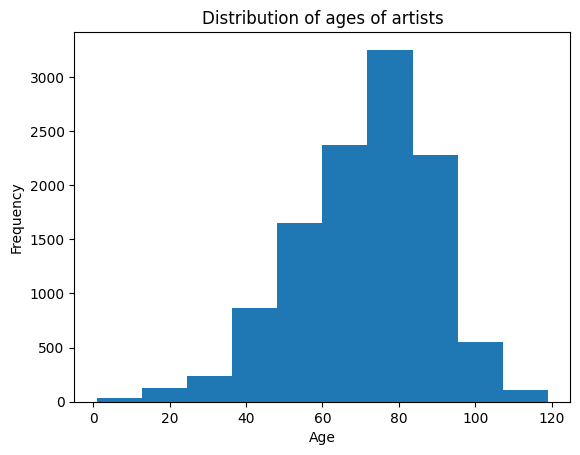

In [4]:
# create a list for ages of artists

count = 0
ages = []
for bd in artists_df['BeginDate']:
    if bd == 0:
        count = count + 1
        continue
    if artists_df['EndDate'][count] == 0:
        age = 2023 - bd
        ages = ages + [age]
        count = count + 1
    else:
        age = artists_df['EndDate'][count] - bd
        ages = ages + [age]
        count = count + 1

# exclude some impossible values

ages = [age for age in ages if age < 120]

plt.hist(ages)
plt.title('Distribution of ages of artists')
plt.xlabel('Age')
plt.ylabel('Frequency')

Above is the distribution of ages of artists in this collection with impossible values excluded. We can see that the majority of artists in this collection ages from around 50 to 90. 

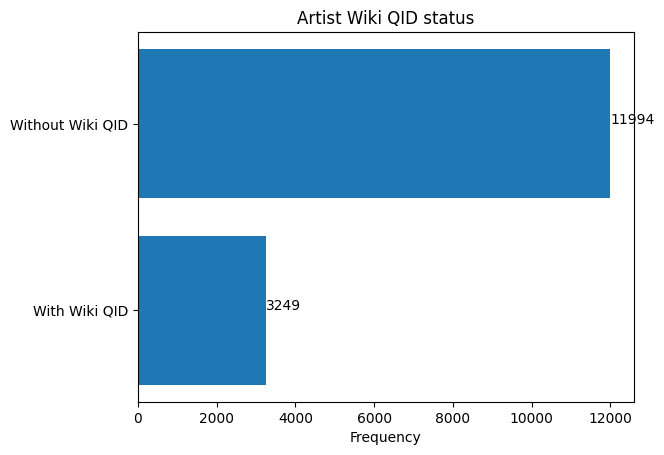

In [5]:
# create a list for counts of artists with and without Wiki QID

type = ['With Wiki QID', 'Without Wiki QID']
count = [0, 0]


for i in artists_df['Wiki QID']:
    if pd.isna(i):
        count[1] = count[1] + 1
    else:
        count[0] = count[0] + 1

plt.barh(type, count)
 
for index, value in enumerate(count):
    plt.text(value, index,str(value))
 
plt.title('Artist Wiki QID status')
plt.xlabel('Frequency')
plt.show()

The above plot shows the number of artists with and without Wiki QID. We can see that the majority of artists in this collection does not have a Wiki QID, implying that this collection probably does not have a tendency towards famous artists. 

In [6]:
date_list = []
for i in artworks_df['Date']:
  if (not pd.isna(i)) and i.isnumeric() and len(i) == 4:
    date_list = date_list + [int(i)]

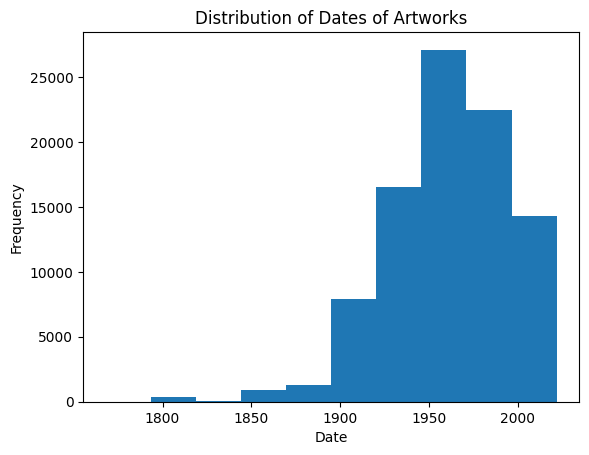

In [7]:
#| echo: false
plt.hist(date_list)
plt.title('Distribution of Dates of Artworks')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

Above is a histogram on the distribution of dates that artworks are created. We can see that the graph is right skewed, which means it flavors artworks that are more contemporary as a modern art collection, and has the most artworks created from early 1900s to 2000s. 

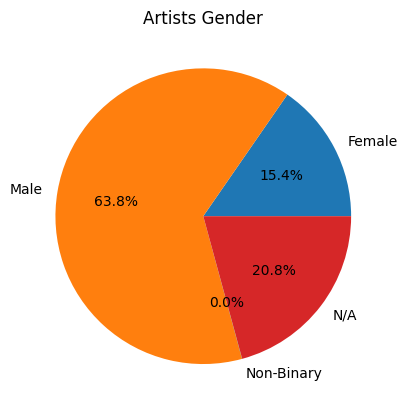

In [8]:
gender = ['Female', 'Male', 'Non-Binary', 'N/A']
gender_count = [0, 0, 0, 0]

for i in artists_df['Gender']:
    if pd.isna(i):
        gender_count[3] += 1
    elif i.lower() == 'female':
        gender_count[0] += 1
    elif i.lower() == 'male':
        gender_count[1] += 1
    elif i.lower() == 'non-binary':
        gender_count[2] += 1
    else:
        gender_count[3] += 1

plt.pie(gender_count, labels=gender, autopct='%1.1f%%')
plt.title('Artists Gender')
plt.show()

From the plot, we can see that most of the artists in this collection are male, 15.4% of them are female, and only nearly neglectable part of them are non-binary. This shows that male artists are more recognized and acknowledged generally within the range of collection. As shown on former graph, the major range of collection for this dataset is between 1900 and 2010, to explore more about how gender of artists could affect themselves and their artworks and how it combines with other factors such as dates and history backgrounds, it is worthy do dig deeper into the relationships of gender and other data in the following focused analysis. 

Also, we can see that the nationality in the dataframe is noted in a different way from geopanda's notion of country names. Thus, we can add a new column of country name corresponding to the 'Nationality' column. 

In [9]:
# Read a new csv file that corresponds nationality to country
nationality_country = pd.read_csv('https://github.com/knowitall/chunkedextractor/raw/master/src/main/resources/edu/knowitall/chunkedextractor/demonyms.csv')

In [10]:
nationality_country.columns = ['Nationality', 'Country']

In [11]:
# Create a new column to store country name
artworks_df['Country'] = '-'

count = 0
for i in artworks_df['Nationality']:
    try: 
        # remove the ()
        nat = i[1:len(i)-1]
        artworks_df['Country'][count] = nationality_country.loc[nationality_country['Nationality'] == nat, 'Country'].values[0]
        count += 1
    except:
        count += 1

/tmp/ipykernel_646/3593956855.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['Country'][count] = nationality_country.loc[nationality_country['Nationality'] == nat, 'Country'].values[0]


### Focused Analysis

* Through some exploratoration on the dataset, we can see that this collection does not have uniform distribution on a lot of aspects of artists and artworks. It provides some general insights on the dataset, but not enough to allow us to make conclutions or imply some other underlying factors that causes such distributions. 

* The next session includes a further analysis of the data and provides visualizations to provide a deeper look into the dataset and useful insights that cuts in from a more detailed look to explore the research question. 

In [12]:
# add a new column 'Area' to the dataframe, rounded up to two decimals, in cm^2
artworks_df['Area'] = '-'

count = 0
for a in artworks_df['Area']:
  if pd.isna(artworks_df['Height (cm)'][count]) or pd.isna(artworks_df['Width (cm)'][count]):
    artworks_df['Area'][count] = 0
    count += 1
  else:
    artworks_df['Area'][count] = round(artworks_df['Height (cm)'][count] * artworks_df['Width (cm)'][count], 2)
    count += 1

/tmp/ipykernel_646/658045223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['Area'][count] = round(artworks_df['Height (cm)'][count] * artworks_df['Width (cm)'][count], 2)
/tmp/ipykernel_646/658045223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['Area'][count] = 0


In [13]:
# add a new column for country code for mapping
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

artworks_df['CODE']=alpha3code(artworks_df.Country)

In [14]:
# create a new column to store the sentiment analysis of the title
sia = vader.SentimentIntensityAnalyzer()
myStopWords = list(string.punctuation) + stopwords.words('english')
porter = PorterStemmer()

In [15]:
artworks_df['Sentiment Score'] = 0

count = 0
for t in artworks_df['First Title']:
    t_token = [w for w in word_tokenize(t.lower()) if w not in myStopWords]
    t_token = [porter.stem(token) for token in t_token]
    score = 0
    
    for w in t_token:
        score += sia.polarity_scores(w)['compound']
    
    artworks_df['Sentiment Score'][count] = score
    count += 1

/tmp/ipykernel_646/690819950.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artworks_df['Sentiment Score'][count] = score


In the above part, I was intended to create a column to store the sentiment score by text analyzing the title of the artworks. This does not came as I expected as most artworks have neutral titles and have 0 compound scores.

Therefore, I switched my focus onto studying the relationships between size and date of the artworks, and the gender and nationality of the artists. 

In [16]:
date_min = 3000
date_max = 0
for i in artworks_df['Date']:
  if (not pd.isna(i)) and i.isnumeric() and len(i) == 4:
    i = int(i)
    if i < date_min:
        date_min = i
    if i > date_max: 
        date_max = i

print(date_min)
print(date_max)

1768
2022


Since the 'Date' column in the artworks data does not only contain year, I only collected these with 4-digit year number. 

In [17]:
# create a dataframe for every decade from 1760 to 2020
decade = [*range(1760, 2030, 10)]
date_df = pd.DataFrame(decade, columns=['Date'])

In [18]:
# create new columns for total number, gender, and average area
date_df['Count'] = 0
date_df['Male'] = 0
date_df['Female'] = 0
date_df['Non-binary'] = 0
date_df['Other'] = 0
date_df['Area'] = 0

count = 0
for d in artworks_df['Date']:
    if (not pd.isna(d)) and d.isnumeric() and len(d) == 4:
        # round down to decade
        d = int(d)
        d /= 10
        d = math.floor(d)
        d *= 10
        
        # update count
        date_df.loc[date_df['Date'] == d, 'Count'] += 1
        
        # update gender count
        i = artworks_df['Gender'][count]
        if pd.isna(i):
            date_df.loc[date_df['Date'] == d, 'Other'] += 1
        else:
            i = i[1:len(i)-1]
            if i.lower() == 'female':
                date_df.loc[date_df['Date'] == d, 'Female'] += 1
            elif i.lower() == 'male':
                date_df.loc[date_df['Date'] == d, 'Male'] += 1
            elif i.lower() == 'non-binary':
                date_df.loc[date_df['Date'] == d, 'Non-binary'] += 1
            else:
                date_df.loc[date_df['Date'] == d, 'Other'] += 1
        
        # update area
        a = artworks_df['Area'][count]
        date_df.loc[date_df['Date'] == d, 'Area'] += a
        
        count += 1
    else:
        count += 1

date_df.Area /= date_df.Count
date_df.Area = date_df.Area.round()

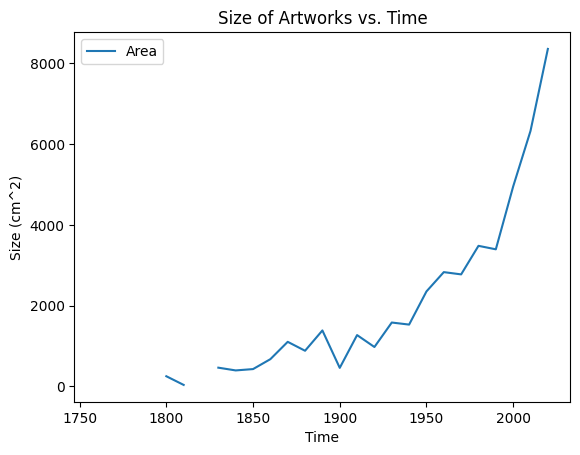

In [19]:
date_df.plot(x='Date', y='Area', kind='line')

plt.title('Size of Artworks vs. Time')
plt.xlabel('Time')
plt.ylabel('Size (cm^2)')
plt.show()

The above graph shows the relationship of the size of artworks through time in the MoMA collection. We can see that there is roughly a exponentially increasing trend on the size of the artworks. This shows that there are more and more larger artworks in this collection. As shown in the distribution of dates of the artworks, this trend is not related to the amount of artworks of the time period in the collection. 

This could be a result of better environments that enables artists to obtain better materials to allow them to produce larger artworks. Meanwhile, it could also be caused by the improving size and environments of the museum, which acquires its first artwork in 1929. Larger area and better maintainence techniques of museums could enable more collection of larger artworks, also encouraging the creation of artworks of larger sizes. 

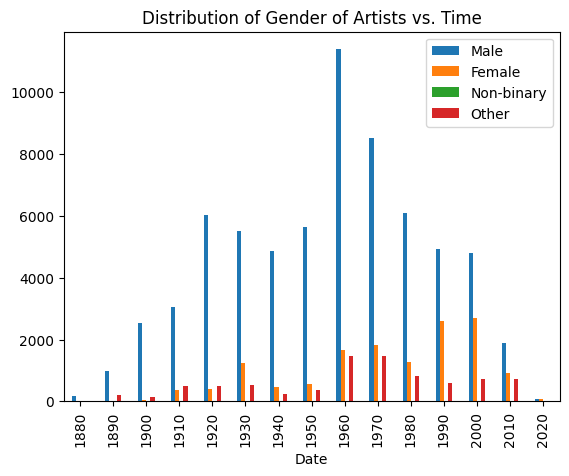

In [20]:
date_df.loc[date_df['Date']>=1880].plot(x='Date', y=['Male', 'Female', 'Non-binary', 'Other'], kind='bar')
plt.title('Distribution of Gender of Artists vs. Time')
plt.show()

In the gender pie chart in the exploration part, I also mentioned that the gender distribution is the general distribution over all of the artists in the dataset. This graph visualizes the number of artists of different gender and the distribution over years. We can see that starting from 1960s, the ratio of female artists has been increasing, which means that more and more artworks by female artists are included in this collection, though it is still worth noting that the number of artworks by male artists is always the greatest. 

This could also be an indication of underrepresented groups in the collection. While the environment is harsher for female and non-binary artists, collection of museum could have mutual influences on the social environment, causing male artists to be easier recognized and acknowledged. 

Is is also worth noting that 'Other' includes all artworks by multiple artists and artists whose genders are not specified. The number of 'Other' artworks is also increasing with time, possibly proving the occurrence of more collaborated artworks. 

In [21]:

gender_list = ['Male', 'Female', 'Non-binary', 'Other']
area_list = [0, 0, 0, 0]
area_count = [0, 0, 0, 0]

count = 0
for a in artworks_df['Area']:
    if not a == 0:
        i = artworks_df['Gender'][count]
        if pd.isna(i):
            area_list[3] += a
            area_count[3] += 1
        else:
            i = i[1:len(i)-1]
            if i.lower() == 'female':
                area_list[1] += a
                area_count[1] += 1
            elif i.lower() == 'male':
                area_list[0] += a
                area_count[0] += 1
            elif i.lower() == 'non-binary':
                area_list[2] += a
                area_count[2] += 1
            else:
                area_list[3] += a
                area_count[3] += 1
    count += 1
                
for i in range(0, 4):
    if area_count[i] != 0: 
        area_list[i] /= area_count[i]
    round(area_list[i], 2)

In [22]:
gender_list.pop(2)
area_list.pop(2)

27525.76

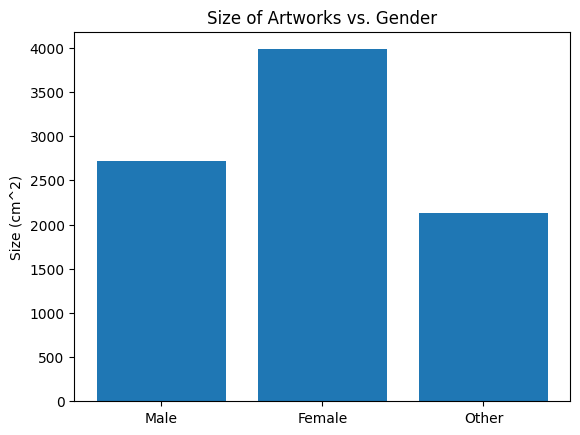

In [23]:
plt.bar(gender_list, area_list)
plt.title('Size of Artworks vs. Gender')
plt.ylabel('Size (cm^2)')
plt.show()

This plot reveals a funny trend about the size of artworks by different genders. The MoMA collection contains a very large number of artworks, allowing this to be a generally applicable trend in this collection that artworks by female artists in this collection is larger in size compared to artworks by male artists. 

Based on the last gender bar graph, we can tell that there are prominently more artworks by male artists than female artists. Therefore, this phenomenom could be a result of female artists being harder to get recognized and acknowledged while their artworks being considered as part of the musuem's collection. For female artists, larger artworks are more favorable and acknowledged in this collection. 

It is worth noting that since there is only two artworks by non-binary artists with size data, the average size of artworks by non-binary artists is remarkable greater than the other three. The dataset is too small to generate meaningful results, so I did not include them in this graph. 

In [24]:
# create a new df storing data for each country/region

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

# merge with location data
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
world=world.merge(location,on='name')

In [25]:
# create a new column to count the number of artworks for each country/region
world['Count'] = 0
for c in artworks_df['CODE']:
    world.loc[world['CODE'] == c, 'Count'] += 1

In [26]:
# create a new column for area
world['Area'] = 0
world['AreaCount'] = 0

count = 0
for c in artworks_df['CODE']:
    world.loc[world['CODE'] == c, 'Area'] += artworks_df['Area'][count]
    if artworks_df['Area'][count] != 0:
        world.loc[world['CODE'] == c, 'AreaCount'] += 1
    count += 1

world.Area /= world.AreaCount

In [27]:
world.Area = world.Area.round()

In [28]:
# create a new column for sentiment 
world['Sentiment'] = 0

count = 0
for c in artworks_df['CODE']:
    world.loc[world['CODE'] == c, 'Sentiment'] += artworks_df['Sentiment Score'][count]
    count += 1

world.Sentiment /= world.Count

In [29]:
world.Sentiment = world.Sentiment.round()

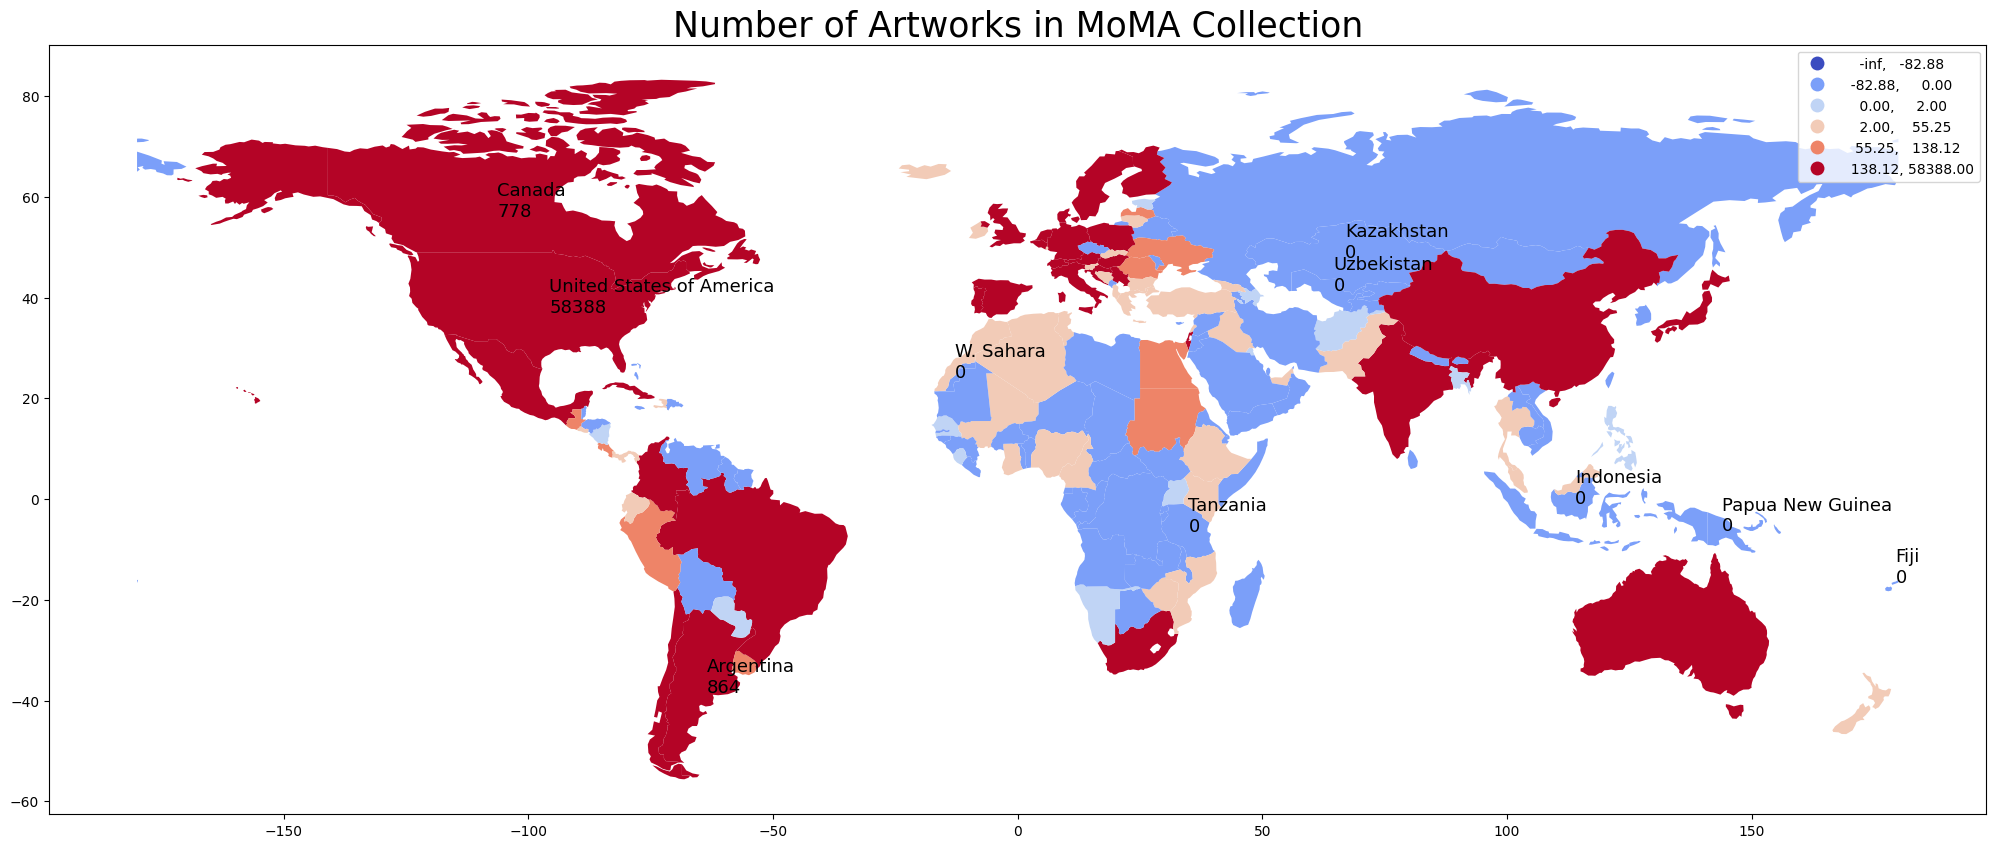

In [30]:
# plot count world map
world.plot(column='Count', scheme="box_plot",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Number of Artworks in MoMA Collection',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(world.longitude[i]),float(world.latitude[i]),"{}\n{}".format(world.name[i],world.Count[i]),size=13)
plt.show()

Above is the distribution of the number of artworks in the MoMA collection, with red representing more artworks collected from this country/region. We can see that most artworks in this collection is from North America, South America, Austrialia, Europe, China, and India. Other than China and India, most artworks are collected from Western countries, with very few collections from north Asia, Africa, and a few North American countries/regions. 

Despite of the name "Museum of Modern Arts", we can see that this dataset is not a great representation of modern arts of the world. It is skewed towards western modern arts and have most of its collection from only some part of the world and specific countries/regions. 

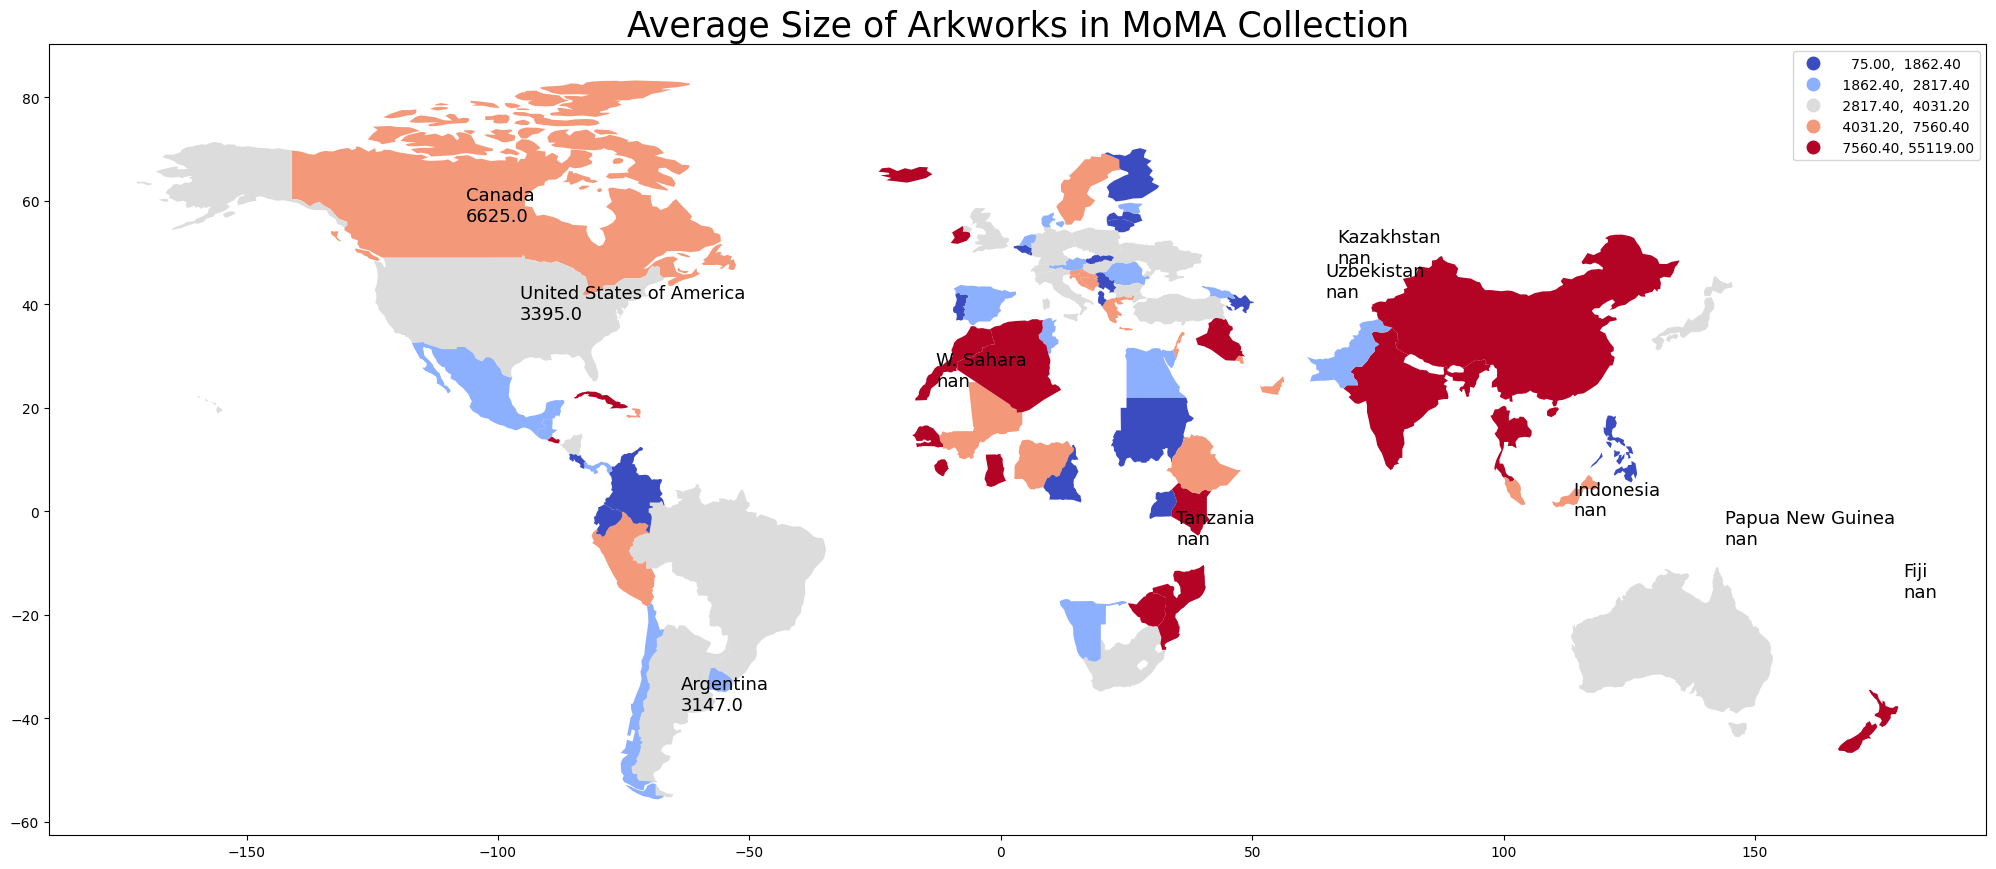

In [31]:
# plot count world map
world.plot(column='Area', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Average Size of Arkworks in MoMA Collection',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(world.longitude[i]),float(world.latitude[i]),"{}\n{}".format(world.name[i],world.Area[i]),size=13)
plt.show()

Above is the world mapped with the average size of artworks created by artists from different countries/regions. Since the mapping starts at 75 square centimeters instead of 0, some part of the mapping is missing because of lack of data from those countries/regions. 

Compared with the last map, although Europe, North America, South America, Australia, and Asia are all among the list of region with the most amount of artworks collected in this dataset, only Asia has the largest average size of artworks, with the other region having about the median average size of artworks. This could show the difference of the criterion and aesthetics between western and eastern culture. 

## Discussion

Through the analysis of the five above graphs, we can see many underlying trends in this collection, with respect to date, gender, region, and size of artworks. This could reveal some implicit factors coming from and affecting how people view modern arts and how the collection is built. 

* There are significantly more artworks by male artists than female artists and other artists. 


* The size of artworks by female artists are genrally greater than male artists. 


* The size of artworks increases exponentially by time. 


* Artworks from some regions are more flavored than other regions in this collection. 


* While the western culture flavors artworks of medium sizes, eastern culture has a prominent tendency on artworks with greater sizes. 

Through these findings, we can see the difference between aesthetics and flavor of modern arts of different cultures, while we can also see the underrepresented groups in this collection. Based off these discoveries and reasonable inferences, we can still see the bias while we are appreciating artworks. 

While these implicit factors could affect the process of collecting and acknowledging artworks, it can also influence the way people view arts and establish their standards and perspectives of modern arts. This could even further influence the way artists create arts, whether explicitly and implicitly. 

It is impossible for people to completely avoid bias, whether during the process of collecting artworks, or even the way artworks are exhibited and shown to the public, but I believe that visualizing these underlying factors would allow us to see and acknowledge these biases, and be conscious of biases and differences, and to further think about and discover the underlying reasons and eventually becoming able to minimize them, and create an better environment for underrepresented groups. 

## Reference

* Part of the code on mapping and geopandas comes from https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b. 